In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('data/EPC_Catalonia.csv')
data.head()

,NUM_CAS,ADREÇA,NUMERO,ESCALA,PIS,PORTA,CODI_POSTAL,POBLACIO,COMARCA,NOM_PROVINCIA,...,Energia calefacció demanda,Qualificació energia refrigeració demanda,Energia refrigeració demanda,VENTILACIO US RESIDENCIAL,LONGITUD,LATITUD,GEOREFERÈNCIA,REHABILITACIO_ENERGETICA,ACTUACIONS_REHABILITACIO,DATA_ENTRADA
0,98XVQ2GL3,Calle TOSSA,26,NaN,02,04,17130.0,Escala (L'),Alt Empordà,Girona,...,110.11,C,5.47,NaN,NaN,NaN,NaN,NO,NaN,19/02/2024
1,4BF5S9TD9,Carrer ESGLESIA,13,NaN,NaN,NaN,17474.0,Vilamacolum,Alt Empordà,Girona,...,171.67,C,7.99,NaN,NaN,NaN,NaN,NO,NaN,05/08/2020
2,JZL30CSKV,Partida LA MATA,13,NaN,NaN,NaN,43365.0,Alforja,Baix Camp,Tarragona,...,175.81,D,18.08,NaN,NaN,NaN,NaN,NO,NaN,23/05/2022
3,Q87DJVFN,Carretera D'ALFORJA,11,NaN,NaN,NaN,43350.0,Alforja,Baix Camp,Tarragona,...,32.17,D,26.50,NaN,NaN,NaN,NaN,NO,NaN,14/11/2022
4,SW5NBXJMT,Carrer Àmbit 2 del sector SUD-5,S/N,NaN,NaN,NaN,17469.0,Vilamalla,Alt Empordà,Girona,...,5.92,D,15.95,NaN,NaN,NaN,NaN,NaN,NaN,27/07/2023


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336925 entries, 0 to 1336924
Data columns (total 69 columns):
 #   Column                                                  Non-Null Count    Dtype  
---  ------                                                  --------------    -----  
 0   NUM_CAS                                                 1336925 non-null  object 
 1   ADREÇA                                                  1336925 non-null  object 
 2   NUMERO                                                  1336866 non-null  object 
 3   ESCALA                                                  275216 non-null   object 
 4   PIS                                                     1002988 non-null  object 
 5   PORTA                                                   951983 non-null   object 
 6   CODI_POSTAL                                             1336922 non-null  float64
 7   POBLACIO                                                1336925 non-null  object 
 8   COMARCA     

In [4]:
data.isna().sum()

NUM_CAS                           0
ADREÇA                            0
NUMERO                           59
ESCALA                      1061709
PIS                          333937
                             ...   
LATITUD                       19058
GEOREFERÈNCIA                 19058
REHABILITACIO_ENERGETICA     377548
ACTUACIONS_REHABILITACIO    1319813
DATA_ENTRADA                      0
Length: 69, dtype: int64

In [30]:
data.describe()

,CODI_POSTAL,CODI_POBLACIO,CODI_COMARCA,CODI_PROVINCIA,METRES_CADASTRE,ANY_CONSTRUCCIO,Energia primària no renovable,Emissions de CO2,Consum d'energia final,Cost anual aproximat d'energia per habitatge,...,Emissions enllumenament,Energia calefacció,Energia refrigeració,Energia ACS,Energia enllumenament,Energia calefacció demanda,Energia refrigeració demanda,VENTILACIO US RESIDENCIAL,LONGITUD,LATITUD
count,1.336922e+06,1.336925e+06,1.336908e+06,1.336925e+06,1.336925e+06,323.000000,1.336795e+06,1.336800e+06,1.308439e+06,1.308439e+06,...,1.228008e+06,1.262802e+06,1.262683e+06,1.262802e+06,1.244495e+06,1.262806e+06,1.262503e+06,424294.000000,1.317867e+06,1.317867e+06
mean,1.471416e+04,1.444889e+04,1.966461e+01,1.432539e+01,1.399542e+02,1978.603715,2.098658e+02,4.361441e+01,1.327467e+02,8.495791e+02,...,9.764215e-01,1.424693e+02,8.763096e+00,5.289414e+01,5.701210e+00,9.950120e+01,8.071672e+00,0.670264,2.042265e+00,4.151070e+01
std,1.176372e+04,1.172362e+04,1.205419e+01,1.170290e+01,8.411100e+02,43.476747,2.493819e+02,1.466698e+02,1.383655e+02,9.490725e+03,...,8.856341e+00,8.823625e+01,1.153429e+01,1.104300e+02,5.275293e+01,4.941546e+01,8.979883e+00,0.139222,5.535145e-01,2.969676e-01
min,1.004000e+03,8.001000e+03,1.000000e+00,8.000000e+00,1.000000e+00,1400.000000,-4.821000e+01,-8.170000e+00,-1.237500e+02,-2.441690e+03,...,-1.689000e+01,0.000000e+00,-4.730000e+00,-5.060000e+00,-9.971000e+01,0.000000e+00,0.000000e+00,0.000000,2.500650e-01,4.052914e+01
25%,8.172000e+03,8.019000e+03,1.200000e+01,8.000000e+00,5.800000e+01,1968.500000,1.448100e+02,2.930000e+01,7.374000e+01,8.630000e+00,...,0.000000e+00,8.942000e+01,3.460000e+00,2.669000e+01,0.000000e+00,6.617000e+01,3.400000e+00,0.630000,1.883771e+00,4.137404e+01
50%,8.691000e+03,8.187000e+03,1.300000e+01,8.000000e+00,7.476000e+01,1983.000000,1.943500e+02,3.954000e+01,1.294400e+02,1.501000e+01,...,0.000000e+00,1.293100e+02,6.070000e+00,4.553000e+01,0.000000e+00,9.228000e+01,5.800000e+00,0.630000,2.138852e+00,4.144380e+01
75%,1.725200e+04,1.707900e+04,3.300000e+01,1.700000e+01,1.040000e+02,2003.000000,2.541100e+02,5.200000e+01,1.807300e+02,5.007200e+02,...,0.000000e+00,1.809800e+02,1.105000e+01,6.851000e+01,0.000000e+00,1.255200e+02,1.039000e+01,0.630000,2.223075e+00,4.161348e+01
max,5.225000e+04,4.390700e+04,4.200000e+01,4.300000e+01,3.577920e+05,2017.000000,9.653508e+04,6.039300e+04,6.058920e+04,5.300219e+06,...,2.652240e+03,2.091903e+04,3.438240e+03,7.215464e+04,1.565701e+04,3.622300e+03,1.573100e+03,10.000000,3.296821e+00,4.283890e+01


In [5]:
data.columns

Index(['NUM_CAS', 'ADREÇA', 'NUMERO', 'ESCALA', 'PIS', 'PORTA', 'CODI_POSTAL',
       'POBLACIO', 'COMARCA', 'NOM_PROVINCIA', 'CODI_POBLACIO', 'CODI_COMARCA',
       'CODI_PROVINCIA', 'REFERENCIA CADASTRAL', 'ZONA CLIMATICA',
       'METRES_CADASTRE', 'ANY_CONSTRUCCIO', 'US_EDIFICI',
       'Qualificació de consum d'energia primaria no renovable',
       'Energia primària no renovable', 'Qualificacio d'emissions de CO2',
       'Emissions de CO2', 'Consum d'energia final',
       'Cost anual aproximat d'energia per habitatge', 'VEHICLE ELECTRIC',
       'SOLAR TERMICA', 'SOLAR FOTOVOLTAICA', 'SISTEMA BIOMASSA',
       'XARXA DISTRICTE', 'ENERGIA GEOTERMICA', 'INFORME_INS_TECNICA_EDIFICI',
       'Eina de certificacio', 'VALOR AILLAMENTS', 'VALOR FINESTRES',
       'Motiu de la certificacio', 'VALOR AILLAMENTS CTE',
       'VALOR FINESTRES CTE', 'UTM_X', 'UTM_Y', 'Normativa construcció',
       'Tipus Tramit', 'TIPUS_TERCIARI', 'Qualificació emissions calefacció',
       'Emissions cale

In [54]:
# Create a copy of the dataframe to avoid modifying the original
df = data.copy()

# Selecting relevant columns
relevant_columns = [
    "REHABILITACIO_ENERGETICA", "ACTUACIONS_REHABILITACIO",
    "Consum d'energia final", "Cost anual aproximat d'energia per habitatge", "METRES_CADASTRE"
]

df = df[relevant_columns].dropna()

# Filtering only buildings that have undergone energy rehabilitation
df = df[df["REHABILITACIO_ENERGETICA"].str.lower() == "si"]

# Converting energy and cost columns to numeric
df["Consum d'energia final"] = pd.to_numeric(df["Consum d'energia final"], errors='coerce')
df["Cost anual aproximat d'energia per habitatge"] = pd.to_numeric(df["Cost anual aproximat d'energia per habitatge"], errors='coerce')
df["METRES_CADASTRE"] = pd.to_numeric(df["METRES_CADASTRE"], errors='coerce')

# Removing potential errors where cost or energy is negative (assuming negative means surplus production)
df = df[(df["Consum d'energia final"] > 0) & (df["Cost anual aproximat d'energia per habitatge"] > 0) & (df["METRES_CADASTRE"] > 0)]

# Calculating energy savings per unit area (assuming pre-renovation energy was higher)
df["Energy Reduction (kWh/m²)"] = df["Consum d'energia final"]  # No pre-renovation data, so using available energy as proxy

# Normalizing cost per m²
df["Cost per m²"] = df["Cost anual aproximat d'energia per habitatge"] / df["METRES_CADASTRE"]

# Avoiding division by very small cost values by setting a minimum threshold
df["Cost per m²"] = df["Cost per m²"].replace(0, np.nan)

# Computing cost-effectiveness metric with realistic constraints
df["Cost Effectiveness"] = df["Energy Reduction (kWh/m²)"] / df["Cost per m²"]

# Capping extreme values to remove unrealistic outliers
q_low, q_high = df["Cost Effectiveness"].quantile([0.05, 0.95])
df = df[(df["Cost Effectiveness"] >= q_low) & (df["Cost Effectiveness"] <= q_high)]

# Grouping by renovation measures
renovation_measures = df.groupby("ACTUACIONS_REHABILITACIO")["Cost Effectiveness"].mean().sort_values(ascending=False)


<Figure size 1200x600 with 0 Axes>

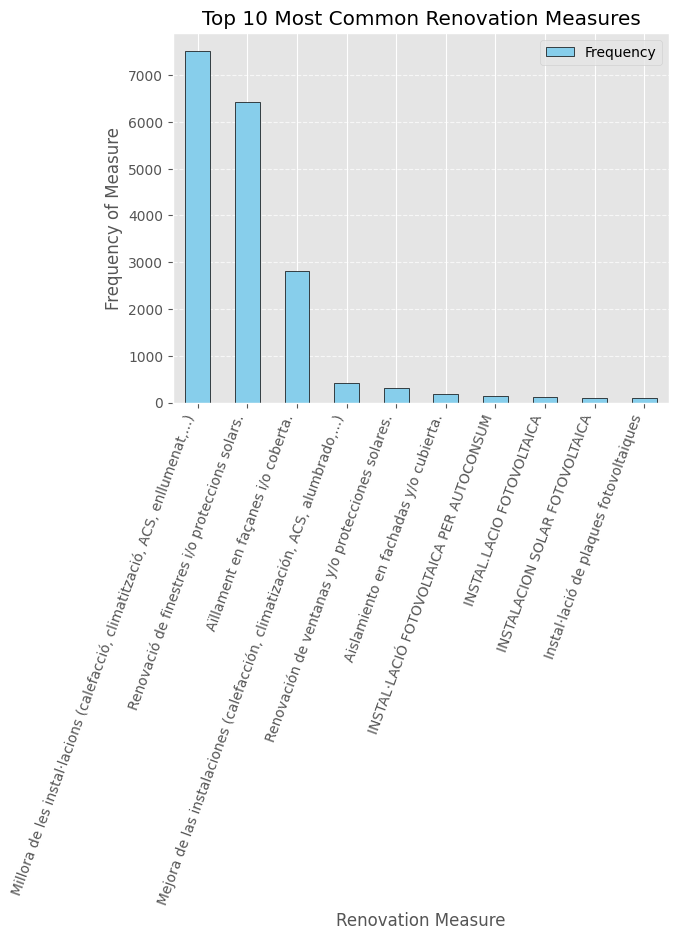

In [55]:
from collections import Counter
import re


def extract_measures(text):
    if pd.isna(text):
        return ["Altres"]
    measures = list(set(text.split(" || ")))
    return measures

df["Extracted Measures"] = df["ACTUACIONS_REHABILITACIO"].apply(extract_measures)

# Flattening the extracted measures into a new DataFrame
measure_counts = Counter([measure for sublist in df["Extracted Measures"] for measure in sublist])
measure_df = pd.DataFrame.from_dict(measure_counts, orient='index', columns=['Frequency']).sort_values(by='Frequency', ascending=False)

# Plotting results
plt.figure(figsize=(12, 6))
measure_df.head(10).plot(kind="bar", color="skyblue", edgecolor="black")
plt.ylabel("Frequency of Measure")
plt.xlabel("Renovation Measure")
plt.title("Top 10 Most Common Renovation Measures")
plt.xticks(rotation=70, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

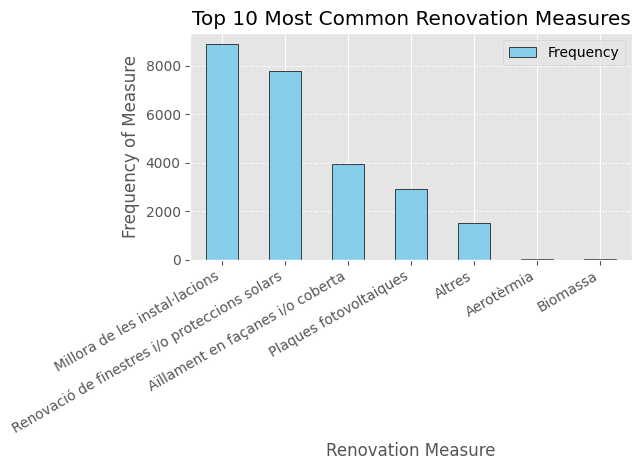

In [108]:
from collections import Counter
import re
from rapidfuzz import process, fuzz

def extract_measures(text):
    if pd.isna(text):
        return ["Altres"]
    measures = list(set(text.split(" || ")))
    return measures
df["Extracted Measures"] = df["ACTUACIONS_REHABILITACIO"].apply(extract_measures)

synonyms = {
    "Plaques fotovoltaiques": [
        "INSTAL·LACIÓ FOTOVOLTAICA", "INSTAL.LACIO FOTOVOLTAICA", "INSTALACION SOLAR FOTOVOLTAICA", 
        "Instal·lació de plaques fotovoltaiques", "INSTALACION FOTOVOLTAICA", "PLAQUES FOTOVOLTAIQUES", 
        "Instal·lació fotovoltaica", "Instalación fotovoltaica finalizada", "Instalación Placas Fotovoltaicas", 
        "Instal·lació plaques fotovoltaiques", "INSTALACIÓN SOLAR FOTOVOLTÁICA", "INSTALACIÓN SOLAR FOTOVOLTAICA",
        "INSTAL·LACIÓ DE PANELLS FOTOVOLTAICS", "INSTAL·LACIÓ SOLAR FOTOVOLTAICA PER AUTOCONSUM",
        "INSTALACION FOTOVOLTAICA PARA AUTOCONSUMO"
    ],
    "Millora de les instal·lacions": [
        "Mejora de las instalaciones", "Millora de les instal·lacions (calefacció, climatització, ACS, enllumenat,...)"
    ],
    "Aïllament en façanes i/o coberta": [
        "Aislamiento en fachadas y/o cubierta", "Aïllament de façanes", "Aïllament en cobertes", 
        "Aislamiento de cubierta", "Aplicació revestiment tipus SATE a la façana"
    ],
    "Renovació de finestres i/o proteccions solars": [
        "Renovación de ventanas y/o protecciones solares", "Substitució de finestres", "Sustitución de ventanas",
        "Substitució finestra sala d'estar", "Substitució vidres"
    ],
    "Aerotèrmia": [
        "Instalación de aerotermia", "Instal·lació aerotèrmia per ACS", "Bomba de calor aerotermica para ACS y calefacción"
    ],
    "Biomassa": [
        "instal·lació de biomassa", "caldera de biomassa", "estufa de biomassa", "pellets"
    ]
}

reverse_synonyms = {v: k for k, values in synonyms.items() for v in values}

# Function to standardize measures using fuzzy matching
def standardize_measures(text):
    if pd.isna(text):
        return ["Altres"]
    measures = list(set(text.split(" || ")))
    standardized = []
    for measure in measures:
        if measure in reverse_synonyms:
            standardized.append(reverse_synonyms[measure])
        else:
            best_match, score, _ = process.extractOne(measure, reverse_synonyms.keys(), scorer=fuzz.partial_ratio)
            if score > 80:
                standardized.append(reverse_synonyms[best_match])
            else:
                standardized.append("Altres")
    return standardized

df["Standardized Measures"] = df["ACTUACIONS_REHABILITACIO"].apply(standardize_measures)

# Flattening the standardized measures into a new DataFrame
measure_counts = Counter([measure for sublist in df["Standardized Measures"] for measure in sublist])
measure_df = pd.DataFrame.from_dict(measure_counts, orient='index', columns=['Frequency']).sort_values(by='Frequency', ascending=False)
# Plotting most common measures
plt.figure(figsize=(12, 6))
measure_df.head(10).plot(kind="bar", color="skyblue", edgecolor="black")
plt.ylabel("Frequency of Measure")
plt.xlabel("Renovation Measure")
plt.title("Top 10 Most Common Renovation Measures")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()



<Figure size 1200x600 with 0 Axes>

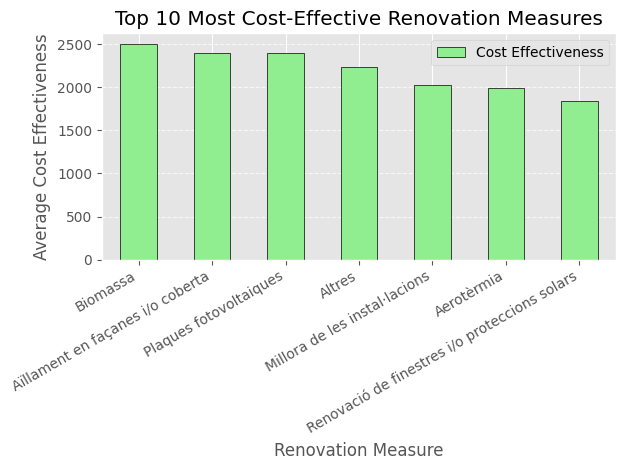

In [61]:
# Calculating average cost-effectiveness per measure
measure_cost_effectiveness = {}
for measure_list, cost_eff in zip(df["Standardized Measures"], df["Cost Effectiveness"]):
    for measure in measure_list:
        if measure in measure_cost_effectiveness:
            measure_cost_effectiveness[measure].append(cost_eff)
        else:
            measure_cost_effectiveness[measure] = [cost_eff]

measure_cost_effectiveness = {k: np.mean(v) for k, v in measure_cost_effectiveness.items()}
measure_cost_df = pd.DataFrame.from_dict(measure_cost_effectiveness, orient='index', columns=['Cost Effectiveness']).sort_values(by='Cost Effectiveness', ascending=False)

# Plotting most cost-effective measures
plt.figure(figsize=(12, 6))
measure_cost_df.head(10).plot(kind="bar", color="lightgreen", edgecolor="black")
plt.ylabel("Average Cost Effectiveness")
plt.xlabel("Renovation Measure")
plt.title("Top 10 Most Cost-Effective Renovation Measures")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

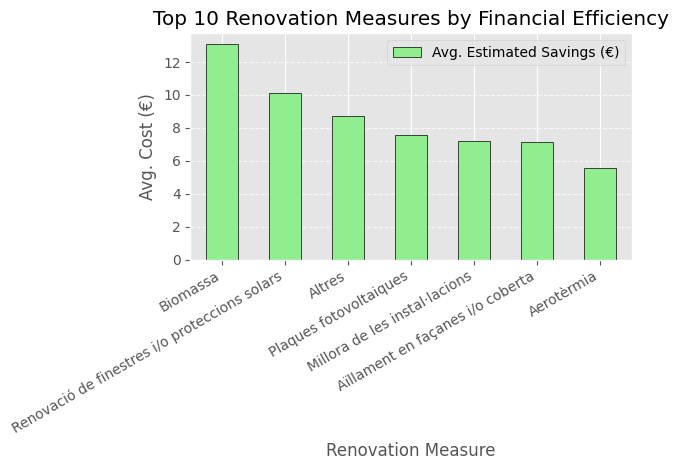

In [110]:
df = data.copy()

# Selecting relevant columns
relevant_columns = [
    "REHABILITACIO_ENERGETICA", "ACTUACIONS_REHABILITACIO",
    "Consum d'energia final", "Cost anual aproximat d'energia per habitatge", "METRES_CADASTRE"
]

df = df[relevant_columns].dropna()

# Filtering only buildings that have undergone energy rehabilitation
df = df[df["REHABILITACIO_ENERGETICA"].str.lower() == "si"]

# Converting energy and cost columns to numeric
df["Consum d'energia final"] = pd.to_numeric(df["Consum d'energia final"], errors='coerce')
df["Cost anual aproximat d'energia per habitatge"] = pd.to_numeric(df["Cost anual aproximat d'energia per habitatge"], errors='coerce')
df["METRES_CADASTRE"] = pd.to_numeric(df["METRES_CADASTRE"], errors='coerce')

# Removing potential errors where cost or energy is negative
df = df[(df["Consum d'energia final"] > 0) & (df["Cost anual aproximat d'energia per habitatge"] > 0) & (df["METRES_CADASTRE"] > 0)]

# Average electricity cost (€/kWh) based on provided historical data
energy_cost_per_kwh = np.mean([
    0.2436, 0.2347,0.2454, 0.3350, 0.3071,
    0.2816, 0.2323, 0.2298, 0.2239, 0.2394,
    0.2403])

synonyms = {
    "Plaques fotovoltaiques": [
        "INSTAL·LACIÓ FOTOVOLTAICA", "INSTAL.LACIO FOTOVOLTAICA", "INSTALACION SOLAR FOTOVOLTAICA", 
        "Instal·lació de plaques fotovoltaiques", "INSTALACION FOTOVOLTAICA", "PLAQUES FOTOVOLTAIQUES", 
        "Instal·lació fotovoltaica", "Instalación fotovoltaica finalizada", "Instalación Placas Fotovoltaicas", 
        "Instal·lació plaques fotovoltaiques", "INSTALACIÓN SOLAR FOTOVOLTÁICA", "INSTALACIÓN SOLAR FOTOVOLTAICA",
        "INSTAL·LACIÓ DE PANELLS FOTOVOLTAICS", "INSTAL·LACIÓ SOLAR FOTOVOLTAICA PER AUTOCONSUM",
        "INSTALACION FOTOVOLTAICA PARA AUTOCONSUMO"
    ],
    "Millora de les instal·lacions": [
        "Mejora de las instalaciones", "Millora de les instal·lacions (calefacció, climatització, ACS, enllumenat,...)"
    ],
    "Aïllament en façanes i/o coberta": [
        "Aislamiento en fachadas y/o cubierta", "Aïllament de façanes", "Aïllament en cobertes", 
        "Aislamiento de cubierta", "Aplicació revestiment tipus SATE a la façana"
    ],
    "Renovació de finestres i/o proteccions solars": [
        "Renovación de ventanas y/o protecciones solares", "Substitució de finestres", "Sustitución de ventanas",
        "Substitució finestra sala d'estar", "Substitució vidres"
    ],
    "Aerotèrmia": [
        "Instalación de aerotermia", "Instal·lació aerotèrmia per ACS", "Bomba de calor aerotermica para ACS y calefacción"
    ],
    "Biomassa": [
        "instal·lació de biomassa", "caldera de biomassa", "estufa de biomassa", "pellets"
    ]
}

reverse_synonyms = {v: k for k, values in synonyms.items() for v in values}

# Function to standardize measures using fuzzy matching
def standardize_measures(text):
    if pd.isna(text):
        return ["Altres"]
    measures = list(set(text.split(" || ")))
    standardized = []
    for measure in measures:
        if measure in reverse_synonyms:
            standardized.append(reverse_synonyms[measure])
        else:
            best_match, score, _ = process.extractOne(measure, reverse_synonyms.keys(), scorer=fuzz.partial_ratio)
            if score > 80:
                standardized.append(reverse_synonyms[best_match])
            else:
                standardized.append("Altres")
    return standardized

df["Standardized Measures"] = df["ACTUACIONS_REHABILITACIO"].apply(standardize_measures)

measure_savings = {}
for measure_list, savings in zip(df["Standardized Measures"], df["Cost anual aproximat d'energia per habitatge"]):
    for measure in measure_list:
        if measure in measure_savings:
            measure_savings[measure].append(savings)
        else:
            measure_savings[measure] = [savings]

measure_savings = {k: np.mean(v) for k, v in measure_savings.items()}
efficiency_df = pd.DataFrame.from_dict(measure_savings, orient='index', columns=['Avg. Estimated Savings (€)']).sort_values(by='Avg. Estimated Savings (€)', ascending=False)

# Plot estimated savings
plt.figure(figsize=(12, 6))
efficiency_df.head(10).plot(kind="bar", color="lightgreen", edgecolor="black")
plt.ylabel("Avg. Cost (€)")
plt.xlabel("Renovation Measure")
plt.title("Top 10 Renovation Measures by Financial Efficiency")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

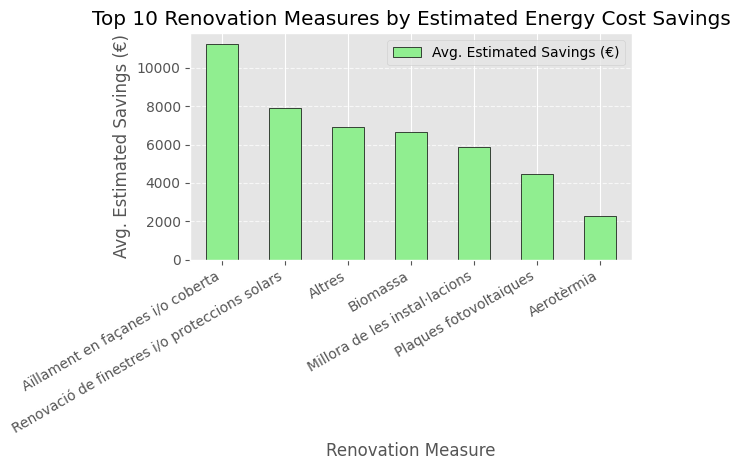

In [111]:
df = data.copy()

# Selecting relevant columns
relevant_columns = [
    "REHABILITACIO_ENERGETICA", "ACTUACIONS_REHABILITACIO",
    "Consum d'energia final", "Cost anual aproximat d'energia per habitatge", "METRES_CADASTRE"
]

df = df[relevant_columns].dropna()

# Filtering only buildings that have undergone energy rehabilitation
df = df[df["REHABILITACIO_ENERGETICA"].str.lower() == "si"]

# Converting energy and cost columns to numeric
df["Consum d'energia final"] = pd.to_numeric(df["Consum d'energia final"], errors='coerce')
df["Cost anual aproximat d'energia per habitatge"] = pd.to_numeric(df["Cost anual aproximat d'energia per habitatge"], errors='coerce')
df["METRES_CADASTRE"] = pd.to_numeric(df["METRES_CADASTRE"], errors='coerce')

# Removing potential errors where cost or energy is negative
df = df[(df["Consum d'energia final"] > 0) & (df["Cost anual aproximat d'energia per habitatge"] > 0) & (df["METRES_CADASTRE"] > 0)]

# Average electricity cost (€/kWh) based on provided historical data
energy_cost_per_kwh = np.mean([
    0.2436, 0.2347,0.2454, 0.3350, 0.3071,
    0.2816, 0.2323, 0.2298, 0.2239, 0.2394,
    0.2403])

synonyms = {
    "Plaques fotovoltaiques": [
        "INSTAL·LACIÓ FOTOVOLTAICA", "INSTAL.LACIO FOTOVOLTAICA", "INSTALACION SOLAR FOTOVOLTAICA", 
        "Instal·lació de plaques fotovoltaiques", "INSTALACION FOTOVOLTAICA", "PLAQUES FOTOVOLTAIQUES", 
        "Instal·lació fotovoltaica", "Instalación fotovoltaica finalizada", "Instalación Placas Fotovoltaicas", 
        "Instal·lació plaques fotovoltaiques", "INSTALACIÓN SOLAR FOTOVOLTÁICA", "INSTALACIÓN SOLAR FOTOVOLTAICA",
        "INSTAL·LACIÓ DE PANELLS FOTOVOLTAICS", "INSTAL·LACIÓ SOLAR FOTOVOLTAICA PER AUTOCONSUM",
        "INSTALACION FOTOVOLTAICA PARA AUTOCONSUMO"
    ],
    "Millora de les instal·lacions": [
        "Mejora de las instalaciones", "Millora de les instal·lacions (calefacció, climatització, ACS, enllumenat,...)"
    ],
    "Aïllament en façanes i/o coberta": [
        "Aislamiento en fachadas y/o cubierta", "Aïllament de façanes", "Aïllament en cobertes", 
        "Aislamiento de cubierta", "Aplicació revestiment tipus SATE a la façana"
    ],
    "Renovació de finestres i/o proteccions solars": [
        "Renovación de ventanas y/o protecciones solares", "Substitució de finestres", "Sustitución de ventanas",
        "Substitució finestra sala d'estar", "Substitució vidres"
    ],
    "Aerotèrmia": [
        "Instalación de aerotermia", "Instal·lació aerotèrmia per ACS", "Bomba de calor aerotermica para ACS y calefacción"
    ],
    "Biomassa": [
        "instal·lació de biomassa", "caldera de biomassa", "estufa de biomassa", "pellets"
    ]
}

reverse_synonyms = {v: k for k, values in synonyms.items() for v in values}

# Function to standardize measures using fuzzy matching
def standardize_measures(text):
    if pd.isna(text):
        return ["Altres"]
    measures = list(set(text.split(" || ")))
    standardized = []
    for measure in measures:
        if measure in reverse_synonyms:
            standardized.append(reverse_synonyms[measure])
        else:
            best_match, score, _ = process.extractOne(measure, reverse_synonyms.keys(), scorer=fuzz.partial_ratio)
            if score > 80:
                standardized.append(reverse_synonyms[best_match])
            else:
                standardized.append("Altres")
    return standardized

df["Standardized Measures"] = df["ACTUACIONS_REHABILITACIO"].apply(standardize_measures)
# Calculating energy cost savings
df["Estimated Savings (€)"] = (df["Consum d'energia final"] * energy_cost_per_kwh * df["METRES_CADASTRE"] - df["Cost anual aproximat d'energia per habitatge"])

# Flattening measures for savings analysis
measure_savings = {}
for measure_list, savings in zip(df["Standardized Measures"], df["Estimated Savings (€)"]):
    for measure in measure_list:
        if measure in measure_savings:
            measure_savings[measure].append(savings)
        else:
            measure_savings[measure] = [savings]

measure_savings = {k: np.mean(v) for k, v in measure_savings.items()}
savings_df = pd.DataFrame.from_dict(measure_savings, orient='index', columns=['Avg. Estimated Savings (€)']).sort_values(by='Avg. Estimated Savings (€)', ascending=False)

# Plot estimated savings
plt.figure(figsize=(12, 6))
savings_df.head(10).plot(kind="bar", color="lightgreen", edgecolor="black")
plt.ylabel("Avg. Estimated Savings (€)")
plt.xlabel("Renovation Measure")
plt.title("Top 10 Renovation Measures by Estimated Energy Cost Savings")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


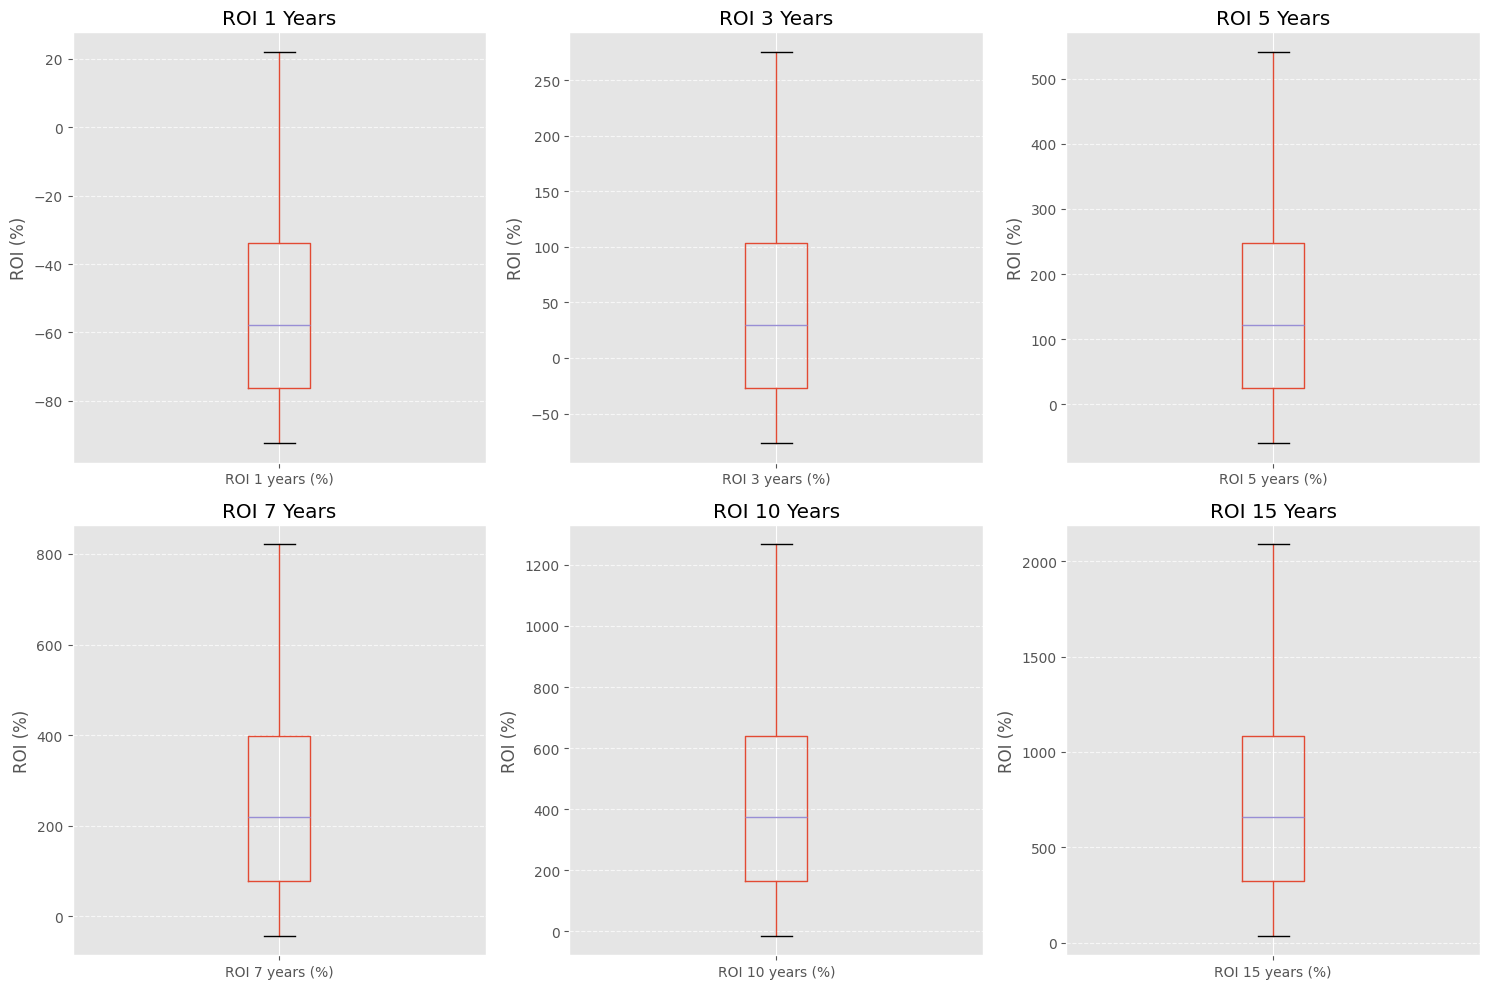

In [117]:
df = data.copy()

# Selecting relevant columns
relevant_columns = [
    "REHABILITACIO_ENERGETICA", "ACTUACIONS_REHABILITACIO",
    "Consum d'energia final", "Cost anual aproximat d'energia per habitatge", "METRES_CADASTRE"
]

df = df[relevant_columns].dropna()

# Filtering only buildings that have undergone energy rehabilitation
df = df[df["REHABILITACIO_ENERGETICA"].str.lower() == "si"]

# Converting energy and cost columns to numeric
df["Consum d'energia final"] = pd.to_numeric(df["Consum d'energia final"], errors='coerce')
df["Cost anual aproximat d'energia per habitatge"] = pd.to_numeric(df["Cost anual aproximat d'energia per habitatge"], errors='coerce')
df["METRES_CADASTRE"] = pd.to_numeric(df["METRES_CADASTRE"], errors='coerce')

# Removing potential errors where cost or energy is negative
df = df[(df["Consum d'energia final"] > 0) & (df["Cost anual aproximat d'energia per habitatge"] > 0) & (df["METRES_CADASTRE"] > 0)]

# Standardizing renovation measures
synonym_groups = {
    "Plaques fotovoltaiques": [
        "plaques solars fotovoltaiques", "instal·lació de plaques fotovoltaiques", "instal·lació fotovoltaica",
        "panells fotovoltaics", "placas solares", "placas fotovoltaicas", "instalación fotovoltaica",
        "instalación de paneles solares", "plaques solars FV", "energia solar fotovoltaica"
    ],
    "Aïllament en façanes i/o coberta": [
        "aïllament en cobertes", "aïllament de façanes", "aïllament tèrmic", "SATE", "revestiment SATE"
    ],
    "Renovació de finestres": [
        "substitució de finestres", "canvi de finestres", "renovación de ventanas", "sustitución de ventanas"
    ],
    "Aerotèrmia": [
        "instal·lació d'aerotèrmia", "bomba de calor aerotèrmica", "aerotermia ACS", "bomba de calor"
    ],
    "Biomassa": [
        "instal·lació de biomassa", "caldera de biomassa", "estufa de biomassa", "pellets"
    ],
    "Altres": []  # Any measure not listed above
}

# Reverse mapping for fast lookup
reverse_synonyms = {v: k for k, values in synonym_groups.items() for v in values}

def standardize_measures(text):
    if pd.isna(text):
        return ["Altres"]
    measures = list(set(text.split(" || ")))
    standardized = []
    for measure in measures:
        if measure in reverse_synonyms:
            standardized.append(reverse_synonyms[measure])
        else:
            best_match, score, _ = process.extractOne(measure, reverse_synonyms.keys(), scorer=fuzz.partial_ratio)
            if score > 80:
                standardized.append(reverse_synonyms[best_match])
            else:
                standardized.append("Altres")
    return standardized

df["Standardized Measures"] = df["ACTUACIONS_REHABILITACIO"].apply(standardize_measures)

# Average electricity cost (€/kWh) based on provided historical data
energy_cost_per_kwh = 0.2165  # Adjusted average

# Investment cost per m²
investment_cost_per_m2 = {
    "Plaques fotovoltaiques": 65,
    "Aïllament en façanes i/o coberta": 70,
    "Renovació de finestres": 40,
    "Aerotèrmia": 100,
    "Biomassa": 85,
    "Altres": 40
}

# Calculate investment cost per property size
def calculate_investment(row):
    total_costs = [investment_cost_per_m2.get(m, 40) * row["METRES_CADASTRE"] for m in row["Standardized Measures"]]
    return np.mean(total_costs) if total_costs else 2000  # Ensure a minimum investment value

df["Investment Cost (€)"] = df.apply(calculate_investment, axis=1)

# Calculating energy cost savings
df["Estimated Savings (€)"] = (df["Consum d'energia final"] * energy_cost_per_kwh * df["METRES_CADASTRE"] - df["Cost anual aproximat d'energia per habitatge"])

# ROI calculation over multiple years
inflation_rate = 0.025
roi_years = [1, 3, 5, 7, 10, 15]

def calculate_roi(row, years, inflation_rate):
    investment = row["Investment Cost (€)"]
    annual_savings = row["Estimated Savings (€)"]
    total_savings = sum(annual_savings * ((1 + inflation_rate) ** i) for i in range(years))
    return ((total_savings - investment) / investment) * 100

for year in roi_years:
    df[f"ROI {year} years (%)"] = df.apply(lambda row: calculate_roi(row, year, inflation_rate), axis=1)

# Remove outliers in ROI calculations
for year in roi_years:
    q_low, q_high = df[f"ROI {year} years (%)"].quantile([0.01, 0.99])
    df = df[(df[f"ROI {year} years (%)"] >= q_low) & (df[f"ROI {year} years (%)"] <= q_high)]

# Plot ROI in subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, year in enumerate(roi_years):
    df.boxplot(column=f"ROI {year} years (%)", ax=axes[i])
    axes[i].set_title(f"ROI {year} Years")
    axes[i].set_ylabel("ROI (%)")
    axes[i].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

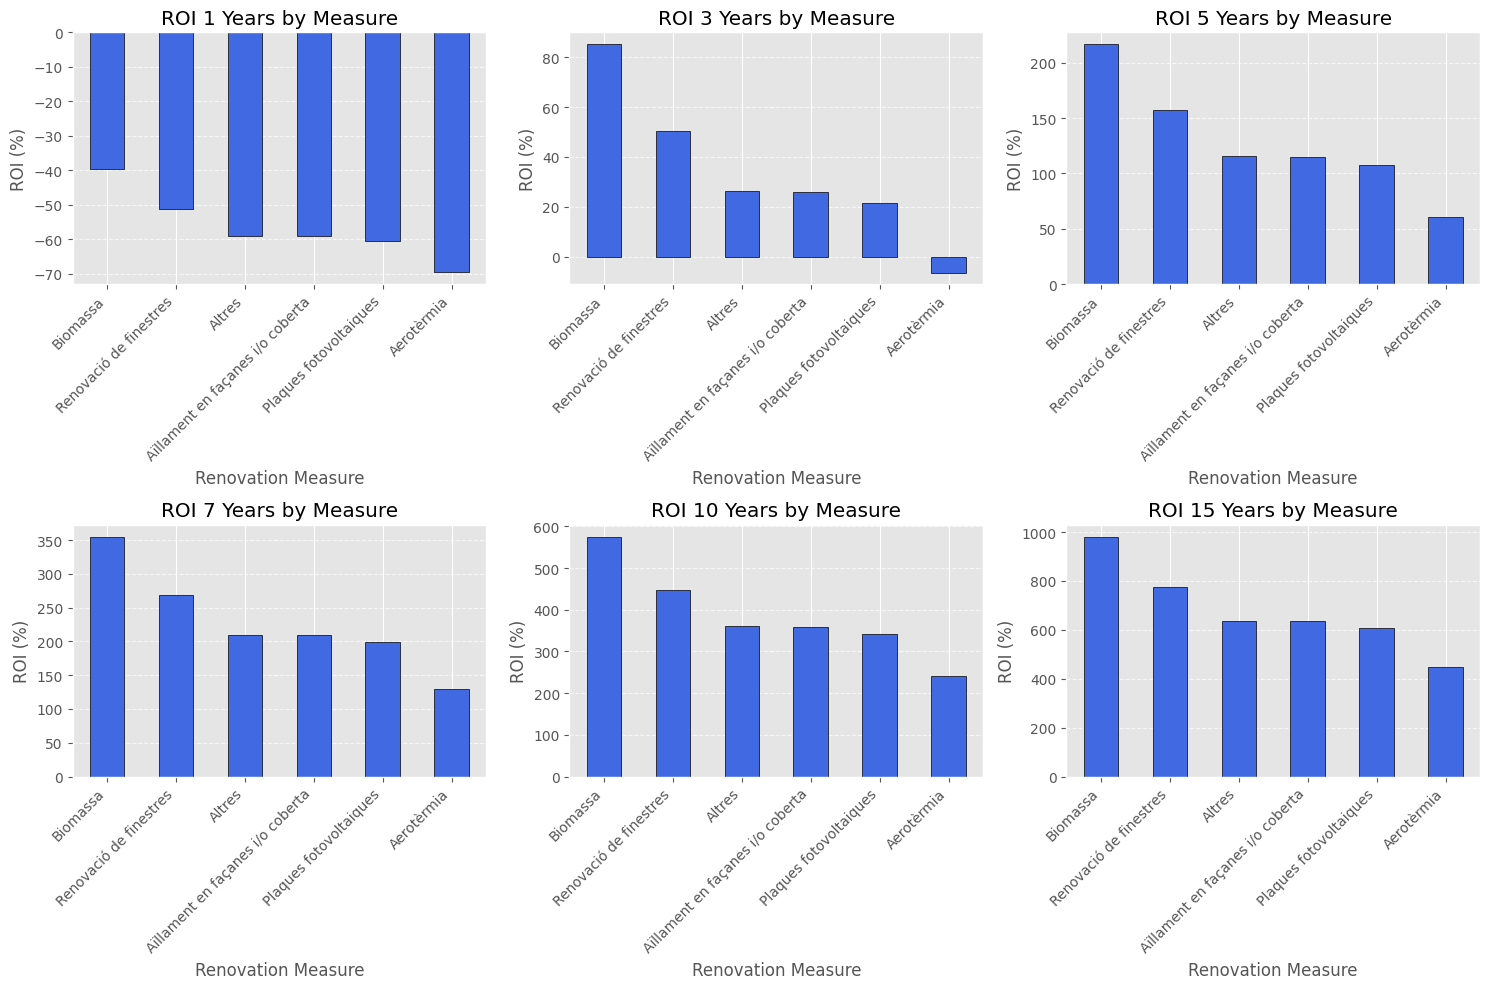

In [119]:
for year in roi_years:
    q_low, q_high = df[f"ROI {year} years (%)"].quantile([0.01, 0.99])
    df = df[(df[f"ROI {year} years (%)"] >= q_low) & (df[f"ROI {year} years (%)"] <= q_high)]

# Grouping ROI by measure
roi_by_measure = {}
for year in roi_years:
    roi_by_measure[year] = df.explode("Standardized Measures").groupby("Standardized Measures")[f"ROI {year} years (%)"].mean().sort_values(ascending=False)

# Plot ROI in subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, year in enumerate(roi_years):
    ax = axes[i]
    roi_by_measure[year].plot(kind="bar", color="royalblue", edgecolor="black", ax=ax)
    ax.set_title(f"ROI {year} Years by Measure")
    ax.set_ylabel("ROI (%)")
    ax.set_xlabel("Renovation Measure")
    ax.set_xticklabels(roi_by_measure[year].index, rotation=45, ha="right")
    ax.grid(axis="y", linestyle="--", alpha=0.7)


plt.tight_layout()
plt.show()

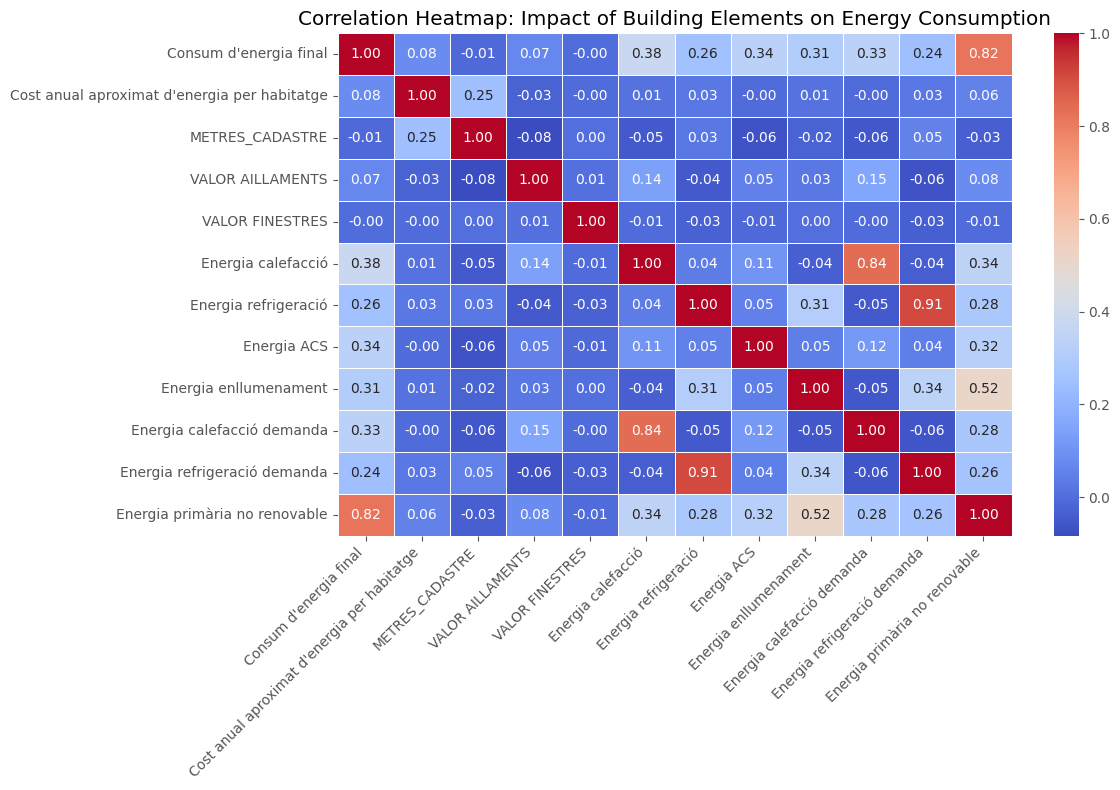

In [124]:
import seaborn as sns
# Create a copy of the dataframe to avoid modifying the original
df = data.copy()

# Selecting relevant numerical columns
numeric_columns = [
    "Consum d'energia final", "Cost anual aproximat d'energia per habitatge", "METRES_CADASTRE",
    "VALOR AILLAMENTS", "VALOR FINESTRES", "Energia calefacció", "Energia refrigeració", "Energia ACS", 
    "Energia enllumenament", "Energia calefacció demanda", "Energia refrigeració demanda", "Energia primària no renovable"
]

# Convert numerical columns to numeric
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert categorical columns to lowercase and filter only "yes" values
df["REHABILITACIO_ENERGETICA"] = df["REHABILITACIO_ENERGETICA"].str.lower()

# Drop NaNs and ensure values are positive
df = df[numeric_columns].dropna()
df = df[(df > 0).all(axis=1)]

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Impact of Building Elements on Energy Consumption")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


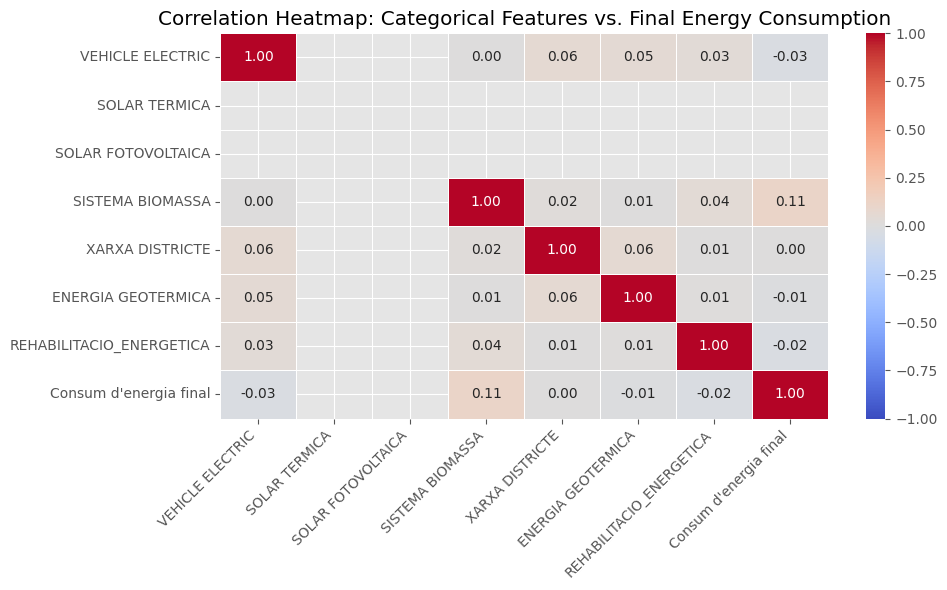

In [134]:
# Create a copy of the dataframe to avoid modifying the original
df = data.copy()

# Define categorical columns
categorical_columns = [
    "VEHICLE ELECTRIC", "SOLAR TERMICA", "SOLAR FOTOVOLTAICA", 
    "SISTEMA BIOMASSA", "XARXA DISTRICTE", "ENERGIA GEOTERMICA", 
    "REHABILITACIO_ENERGETICA"
]

# Define target column
target_column = "Consum d'energia final"

# Convert categorical columns to lowercase and binary (1 for "sí", 0 for "no" or NaN)
for col in categorical_columns:
    df[col] = df[col].str.lower().apply(lambda x: 1 if x == "si" else 0)

# Ensure target column is numeric
df[target_column] = pd.to_numeric(df[target_column], errors='coerce')

# Select relevant columns for correlation
columns_to_correlate = categorical_columns + [target_column]

# Drop rows with NaN in any of the selected columns
df = df[columns_to_correlate].dropna()

# Compute correlation matrix
correlation_matrix = df.corr()

# Extract correlations with the target (optional subset for clarity)
correlation_with_target = correlation_matrix[[target_column]].loc[categorical_columns]

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Categorical Features vs. Final Energy Consumption")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [132]:
df[categorical_columns].describe()

,VEHICLE ELECTRIC,SOLAR TERMICA,SOLAR FOTOVOLTAICA,SISTEMA BIOMASSA,XARXA DISTRICTE,ENERGIA GEOTERMICA,REHABILITACIO_ENERGETICA
count,1.308439e+06,1308439.0,1308439.0,1.308439e+06,1.308439e+06,1.308439e+06,1.308439e+06
mean,5.339187e-03,0.0,0.0,2.541425e-02,2.366178e-03,1.281680e-03,1.390665e-02
std,7.287444e-02,0.0,0.0,1.573798e-01,4.858581e-02,3.577762e-02,1.171036e-01
min,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,0.0,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
